1.a: Best case, SVM on entire train data
Accuracy score: 0.825
1.b: SVM on 2*L train data
Accuracy score: [0.585, 0.585, 0.65, 0.645, 0.72, 0.745, 0.745, 0.81, 0.79, 0.8]
1.c: S3VM on 2*L train data
Accuracy score: [0.72, 0.625, 0.72, 0.73, 0.755, 0.77, 0.77, 0.77, 0.77, 0.77]


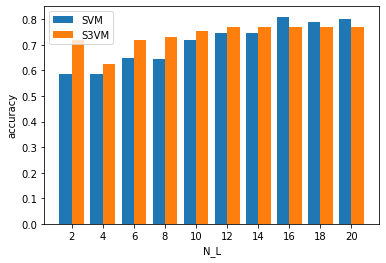

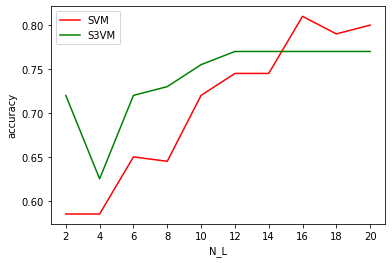

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec  1 10:27:15 2022

@author: Fcs10
"""

import warnings
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)
from qns3vm import QN_S3VM
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import warnings
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)


train_data=pd.read_csv("F:/pythonProject/hw5/H5_Pr1_data/ssl_train_data.csv")
test_data=pd.read_csv("F:/pythonProject/hw5/H5_Pr1_data/ssl_train_data.csv")


train_data["class"].replace(to_replace=0, value=-1, inplace=True)
test_data["class"].replace(to_replace=0, value=-1, inplace=True)


Xtrain=train_data.iloc[:,:10]
Ytrain=train_data.iloc[:,-1]
Xtest=test_data.iloc[:,:10]
Ytest=test_data.iloc[:,-1]

model_a=SVC(C=1.0, kernel='linear')
model_a=model_a.fit(Xtrain,Ytrain)
Ypred_a=model_a.predict(Xtest)
score_a=accuracy_score(Ytest,Ypred_a)
print("1.a: Best case, SVM on entire train data")
print("Accuracy score: {}".format(score_a))
a=str(score_a)



L=np.arange(1,11)
score_b=[]
for l in L:
    X_train=Xtrain.iloc[:2*l,:]
    Y_train=Ytrain.iloc[:2*l]
    model_b=SVC(C=1.0, kernel='linear')
    model_b=model_b.fit(X_train,Y_train)
    Ypred_b=model_b.predict(Xtest)
    score=accuracy_score(Ytest,Ypred_b)
    score_b.append(score)
print("1.b: SVM on 2*L train data")
print("Accuracy score: {}".format(score_b))




my_random_generator = random.Random()
my_random_generator.seed(0)
score_c=[]
for l in L:
    X_train_l=Xtrain.iloc[:2*l,:].values.tolist()
    X_train_u=Xtrain.iloc[2*l:,:].values.tolist()
    Y_train_l=Ytrain.iloc[:2*l].values.tolist()
    model_c=QN_S3VM(X_train_l,Y_train_l,X_train_u,my_random_generator,kernel_type="Linear",lam=1.0)
    model_c.train()
    Ypred_c=model_c.getPredictions(Xtest)
    score=accuracy_score(Ytest,Ypred_c)
    score_c.append(score)
print("1.c: S3VM on 2*L train data")
print("Accuracy score: {}".format(score_c))

a=str(score_a)
b=str(score_b)
c=str(score_c)
file=open("answer.txt",mode='w')
file.write("1.a: Best case, SVM on entire train data\n")
file.write("accuracy score:")
file.write(a)
file.write("\n\n")
file.write("1.b: SVM on 2*L train data\n")
file.write("accuracy score:")
file.write(b)
file.write("\n\n")
file.write("1.c: S3VM on 2*L train data\n")
file.write("accuracy score:")
file.write(c)
file.close()


X_axis=np.arange(len(2*L))
plt.bar(X_axis - 0.2, score_b, 0.4, label = 'SVM')
plt.bar(X_axis + 0.2, score_c, 0.4, label = 'S3VM')
plt.xticks(X_axis, 2*L)
plt.xlabel('N_L')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(2*L,score_b,'r',label='SVM')
plt.plot(2*L,score_c,'g',label='S3VM')
plt.xticks(2*L)
plt.xlabel('N_L')
plt.ylabel('accuracy')
plt.legend()
plt.show()

